## Real or Not? NLP with Disaster Tweets - Project 2 - Sam's part

Big-Scale Analytics - Project 2 - Team Rolex
> Samuel Lew, Alexandre Lang, Samy Bouzerda, Alix Muller

## Load dataset

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv ('train.csv')
df = df[['id', 'keyword', 'location', 'text', 'target']]
df.iloc[:100]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
test = pd.read_csv ('test.csv')
test = test[['id', 'keyword', 'location', 'text']]
test.iloc[:10]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [6]:
index = df.index
columns = df.columns
values = df.values

In [7]:
total_count = 0
for row in df.iterrows():
  total_count += 1
print(f'there are {total_count} tweets in the dataset')

df_yes = df.query('target == 1')
yes_count = 0
for row in df_yes.iterrows():
    yes_count += 1
print(f'there are {yes_count} tweets about disasters')

df_no = df.query('target == 0')
no_count = 0
for row in df_no.iterrows():
    no_count += 1
print(f'there are {no_count} tweets that are not about disasters')

print('the classification base rate is ' + str(yes_count/(yes_count+no_count)*100)[:5] + '%')

there are 7613 tweets in the dataset
there are 3271 tweets about disasters
there are 4342 tweets that are not about disasters
the classification base rate is 42.96%


## Process text

In [8]:
!pip install spacy
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/bouzerdasamy/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/bouzerdasamy/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


### Removing stopwords & lowercasing every word:

In [9]:
import string
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from nltk.corpus import stopwords
import nltk


parser = English()
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation

# lowercase, remove punctuation and !letters
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text
  
  
df['filtered_tweet'] = df['text'].apply(lambda x: clean_text(x))


# Updated text
df.head()

,id,keyword,location,text,target,filtered_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [10]:
# Tokenising the tweets
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

df['filtered_tweet'] = df['filtered_tweet'].apply(lambda x: tokenizer.tokenize(x))

df.head()

,id,keyword,location,text,target,filtered_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."


In [11]:
# remove stopwords and punctuation
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords.words('english')]
    text = [word for word in text if word not in punctuations]
    
    return text

df['filtered_tweet'] = df['filtered_tweet'].apply(lambda x: remove_stopwords(x))

df.head()

,id,keyword,location,text,target,filtered_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [12]:
# recreating sentences
def sentence(text):
  sentence = ''
  for word in text:
    sentence = sentence + ' ' + word
  
  return sentence

df['filtered_tweet'] = df['filtered_tweet'].apply(lambda x: sentence(x))

df.head()

,id,keyword,location,text,target,filtered_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified office...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders ca...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires po...


## Data visualization

### Target results

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

color = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['medium blue']]
sns.countplot('target',data = df, palette = color)
plt.gca().set_ylabel('Samples')

Text(0, 0.5, 'Samples')

### Most common locations

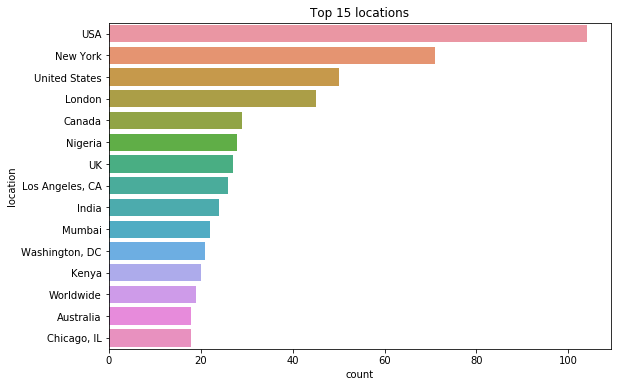

In [14]:
plt.figure(figsize=(9,6))
sns.countplot(y=df.location, order = df.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

NameError: name 'np' is not defined

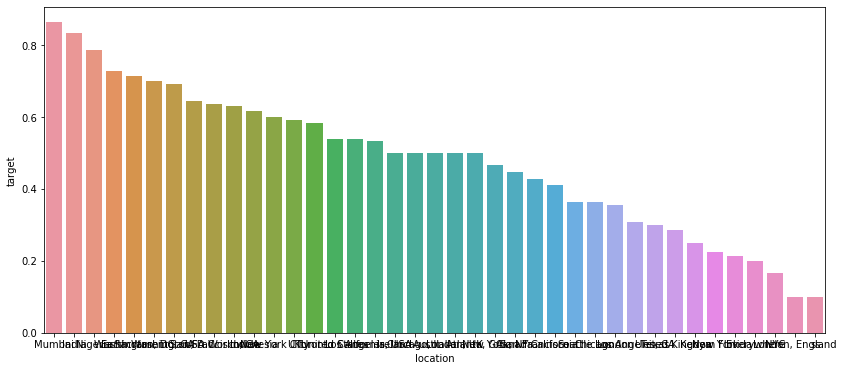

In [15]:
raw_loc = df.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = df[df.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
plt.axhline(np.mean(df.target))
plt.xticks(rotation=80)
plt.show()

### Distribution of Character, Word and Sentence Frequency

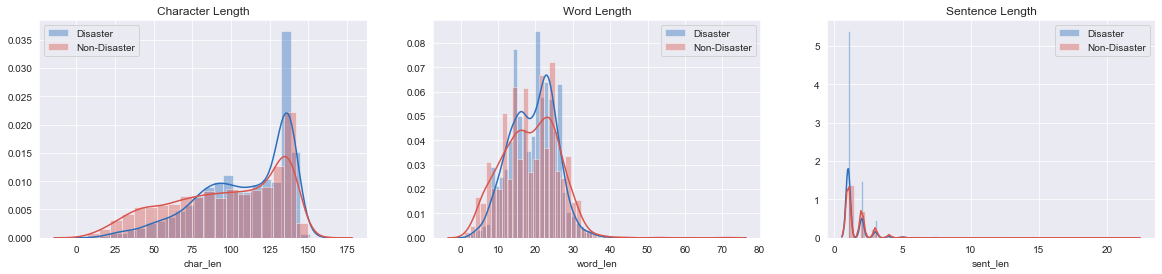

In [24]:
#import nltk
#nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
df['char_len'] = df.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in df.text]
df['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in df.text]
df['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(df[df.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
    sns.distplot(df[df.target == 0][plot_cols[i]], label='Non-Disaster', color=color[0])
    plt.legend()

### Most common stopwords

Text(0.5, 1.0, 'Top Stopwords for  Non-Disaster Tweets')

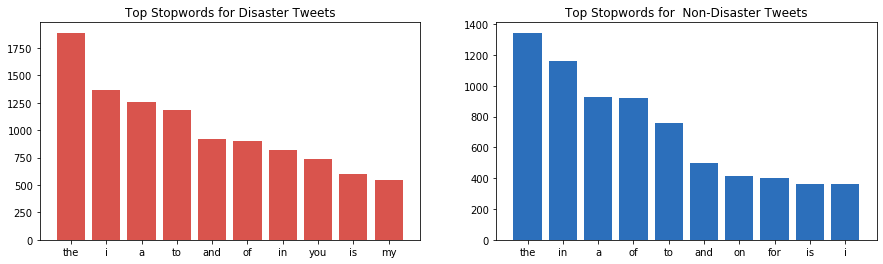

In [17]:
## Plot most common stopwords

#nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in df[df.target == 0].text for word in word_tokenize(tweet)]
corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in df[df.target == 1].text for word in word_tokenize(tweet)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Non-Disaster Tweets')

### Most common punctuations

Text(0.5, 1.0, 'Top Punctuations for Non-Disaster Tweets')

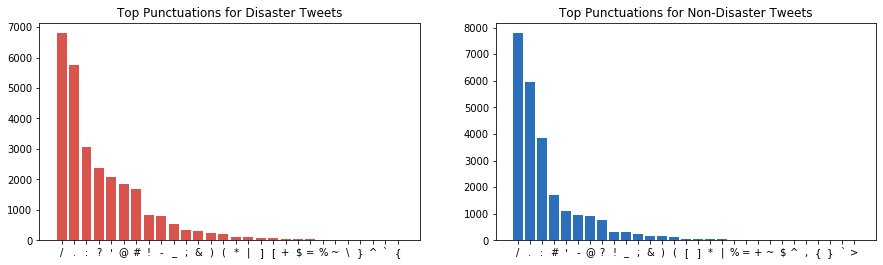

In [18]:
## Plot most common punctuations

from string import punctuation

# Get all the punctuations in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(c) for tweet in df[df.target == 0].text for c in tweet]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Disaster
[corpus1.append(c) for tweet in df[df.target == 1].text for c in tweet]
corpus1 = list(filter(lambda x: x in punctuation, corpus1)) 

from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Non-Disaster Tweets')

### Most common words

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

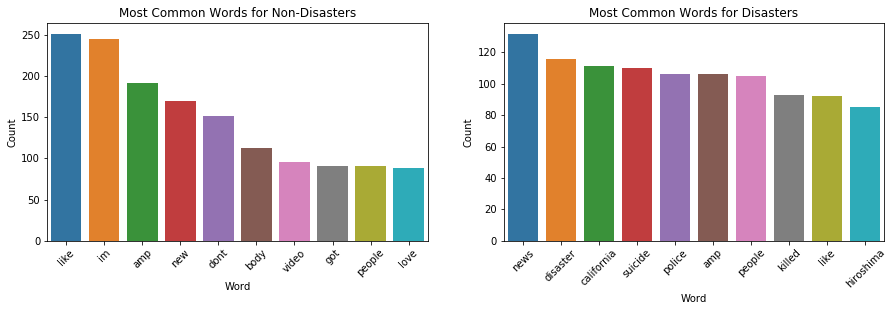

In [19]:
## Plot most common words
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Get all the word tokens in dataframe for Disaster and Non-Disaster
# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in df[df.target == 0].text for word in word_tokenize(remove_url(tweet))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in df[df.target == 1].text for word in word_tokenize(remove_url(tweet))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

# Plot for Disaster and Non-Disaster
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10)).set_title('Most Common Words for Non-Disasters')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10)).set_title('Most Common Words for Disasters')
plt.xticks(rotation=45)

### World cloud

Text(0.5, 1.0, 'Disaster')

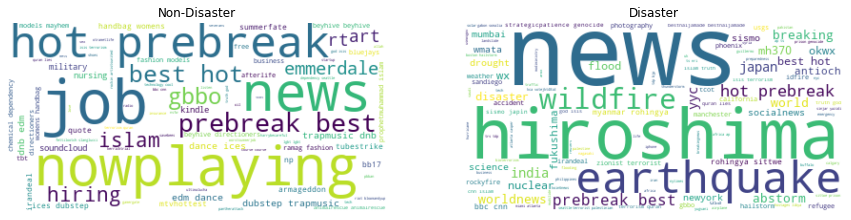

In [20]:
#!pip install wordcloud
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

from wordcloud import WordCloud

def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for tweet in df[df.target == target].text for w in tweet.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(hashtag)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,4))
wc_hash(0)
plt.title('Non-Disaster')
wc_hash(1)
plt.title('Disaster')

## Decision Tree Regression model

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [22]:
df.head(10)

,id,keyword,location,text,target,filtered_tweet,char_len,word_len,sent_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified office...,133,24,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders ca...,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires po...,88,18,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed direct...,110,23,2
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodi...,95,17,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im top hill see fire woods,59,17,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,theres emergency evacuation happening buildin...,79,13,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid tornado coming area,52,12,1


In [35]:

##!python -m spacy download en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [26]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

punctuations = string.punctuation

nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() 
                if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens 
                if word not in stop_words and word not in punctuations ]

    return mytokens


tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [27]:
print(tfidf_vector)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x117b136a8>,
                use_idf=True, vocabulary=None)


In [28]:
X_DT = df['text']
y_DT = df['target']

In [29]:
X_DT.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [30]:
y_DT.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size=0.2, random_state=72)

In [32]:
#import the regressor
from sklearn.tree import DecisionTreeRegressor

classifier = DecisionTreeRegressor

#create a regressor object
DTregressor = DecisionTreeRegressor(criterion='mse', max_depth=7, min_samples_leaf=1, random_state=72)

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])


#fit the regressor with X and Y data
pipe.fit(X_DT_train, y_DT_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [33]:
#create a regressor object
DTregressor = DecisionTreeRegressor(criterion='mse', max_depth=7, min_samples_leaf=1, random_state=72)

In [34]:
from sklearn import metrics
predicted = pipe.predict(X_DT_test)

print(" test Accuracy:",metrics.accuracy_score(y_test, predicted))
print(" Precision:",metrics.precision_score(y_test, predicted, average=None))
print(" Recall:",metrics.recall_score(y_test, predicted, average=None))

TypeError: predict() missing 1 required positional argument: 'X'

### Logistic regression

In [ ]:
#!python -m spacy download en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [ ]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() 
                if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens 
                if word not in stop_words and word not in punctuations ]

    return mytokens


tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
X = df['filtered_tweet']
ylabels = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=72)

In [ ]:
def log_reg(i):
    X = df['filtered_tweet']
    ylabels = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=i, random_state=72)

    classifier = LogisticRegression(solver="lbfgs")

# Create pipeline using Bag of Words
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# model generation
    pipe.fit(X_train, y_train)

    predicted = pipe.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, predicted)
    precision = metrics.precision_score(y_test, predicted, average=None)
    recall = metrics.recall_score(y_test, predicted, average=None)
    
    return accuracy, precision, recall, i, predicted
    
  
accuracy, precision, recall, i, predicted = log_reg(0.2)

In [ ]:
print(f'For a train/test split treshold of {i}: \n')

print(f'We can see here that our model identified a tweet about a disaster {str(accuracy*100)[:4]}% of the time. \n')

print(f'When it predicted a tweet to be about a disaster, it was correctly assessed {str(precision[0]*100)[:4]}% of the time, \nand was correctly assessed for a tweet not about a disaster {str(precision[1]*100)[:4]}% of the time. \n')

print(f'When given a tweet about a disaster, the model considered it as being about a disaster {str(recall[0]*100)[:4]}% of the time, \nand when given a tweet not about a disaster the model considered it as not a disaster for {str(recall[1]*100)[:4]}% of the time. \n')

### Plot the results for different level of train/test split treshold

In [ ]:
import matplotlib.pyplot as plt

data_acc = {}
data_prec = {}
data_rec = {}


for i in range(1, 10, 1):
  j = i/10
  accuracy, precision, recall, i, predicted = log_reg(j)
  data_acc[j] = accuracy
  data_prec[j] = precision
  data_rec[j] = recall
  
names_acc = list(data_acc.keys())
values_acc = list(data_acc.values())

names_prec = list(data_prec.keys())
values_prec = list(data_prec.values())

names_rec = list(data_rec.keys())
values_rec = list(data_rec.values())

fig, axs = plt.subplots(1, 3, figsize=(11, 3), sharey=True)

axs[0].plot(names_acc, values_acc, label='accuracy')
axs[0].legend()

axs[1].plot(names_prec, values_prec, label='precision')
axs[1].legend(('precision for target=1', 'precision for target=0'))

axs[2].plot(names_rec, values_rec, label='recall')
axs[2].legend(('recall for target=1', 'recall for target=0'))

fig.suptitle('Accuracy, precision and recall for multiple value of train/test split treshold')

### Neural networks